# DATA EXPLORATION AND BASIC STATISTICS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import save_pickle_file, load_pickle_file
from constants import PROCESSED_DATA_PATH

In [2]:
processed_data = load_pickle_file(PROCESSED_DATA_PATH)
df_data = processed_data['df_processed']
df_original = processed_data['df_original']

In [3]:
count_by_location = pd.DataFrame()
count_by_location['count'] = df_data.groupby('location__name').count()['id']
count_by_location['population'] = df_data.groupby('location__name').first()['location__population']
count_by_location['count_relative'] = 100 * count_by_location['count'] / count_by_location['count'].sum()

In [4]:
pivot_category_vs_location = df_original.pivot_table(columns='categories__name',
                        index='location__name', 
                        aggfunc='sum', 
                        fill_value = 0, 
                        values='is_active')

pivot_category_vs_time = df_original.pivot_table(columns='categories__name',
                        index='date_published', 
                        aggfunc='sum',
                        fill_value = 0, 
                        values='is_active')

pivot_location_vs_time = df_original.pivot_table(columns='location__name',
                        index='date_published', 
                        aggfunc='sum',
                        fill_value = 0, 
                        values='is_active')

In [5]:
count_by_location

,count,population,count_relative
location__name,,,
Espoo,1452,280247.0,21.805076
Helsinki,3555,645482.0,53.386394
Oulu,409,202058.0,6.142063
Tampere,720,232407.0,10.812434
Turku,225,189930.0,3.378886
Vantaa,298,224397.0,4.475146


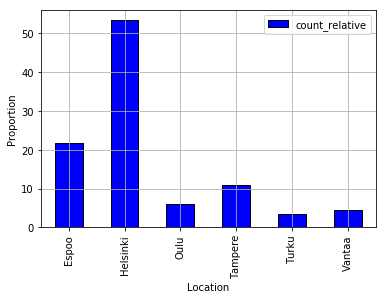

In [6]:
count_by_location.plot(y = 'count_relative', 
                       edgecolor = 'k',
                       kind='bar', 
                       color = 'blue');
plt.ylabel('Proportion')
plt.xlabel('Location')
plt.grid()

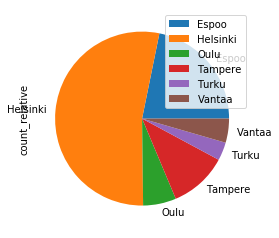

In [7]:
count_by_location.plot.pie(y = 'count_relative');

In [8]:
pivot_category_vs_location = df_original.pivot_table(columns='categories__name',
                        index='location__name', 
                        aggfunc='sum', 
                        fill_value = 0, 
                        values='is_active');

pivot_category_vs_time = df_original.pivot_table(columns='categories__name',
                        index='date_published', 
                        aggfunc='sum',
                        fill_value = 0, 
                        values='is_active');

pivot_location_vs_time = df_original.pivot_table(columns='location__name',
                        index='date_published', 
                        aggfunc='sum',
                        fill_value = 0, 
                        values='is_active');

In [9]:
col_sum = pivot_category_vs_location.sum(axis=0)
pivot_category_vs_location_relative = 100*pivot_category_vs_location.div(col_sum, axis=1)

In [10]:
pivot_category_vs_location

categories__name,NLP,RPA,artificial intelligence,backend,data,data science,database,django,frontend,java,python,software
location__name,,,,,,,,,,,,
Espoo,0,3,26,5,125,15,35,1,2,32,48,144
Helsinki,3,8,93,43,345,71,112,14,17,138,127,351
Oulu,0,1,12,8,25,8,18,0,4,27,31,25
Tampere,0,0,22,13,14,16,27,0,8,22,21,53
Turku,0,0,4,1,11,3,12,2,0,5,4,13
Vantaa,0,0,0,1,22,1,11,0,0,1,0,16


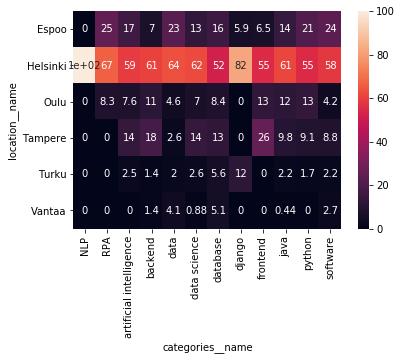

In [11]:
sns.heatmap(pivot_category_vs_location_relative, annot=True);

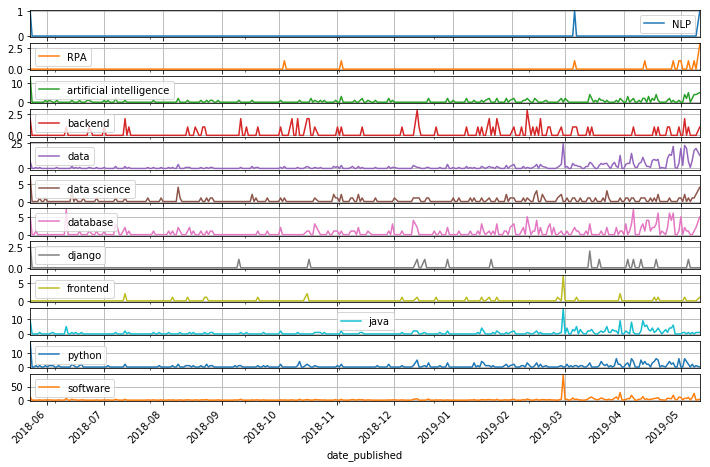

In [12]:
pivot_category_vs_time[1:].plot(rot=45, subplots=True, grid = True, figsize = (12,8), kind = 'line');

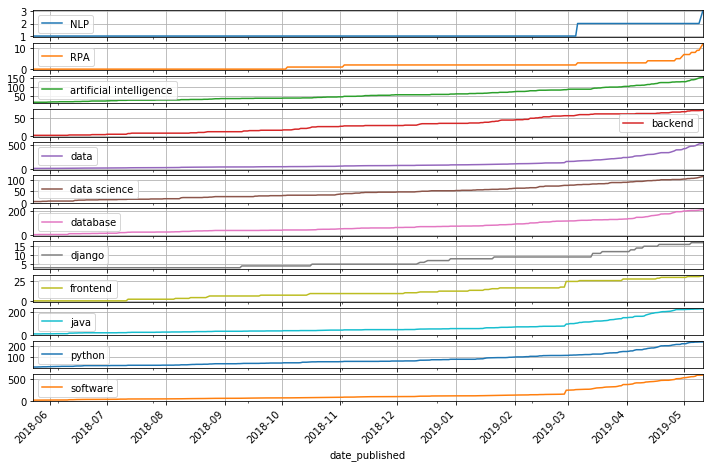

In [13]:
pivot_category_vs_time[1:].cumsum().plot(rot=45, subplots=True, grid = True, figsize = (12,8), kind = 'line');

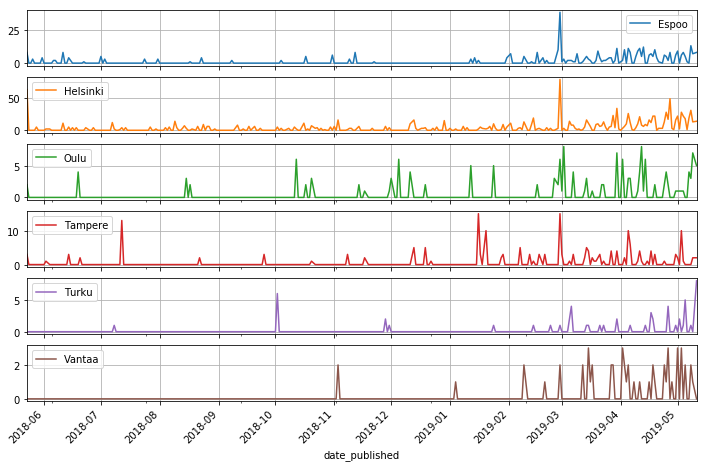

In [14]:
pivot_location_vs_time[1:].plot(rot=45, subplots=True, grid = True, figsize = (12,8), kind='line');

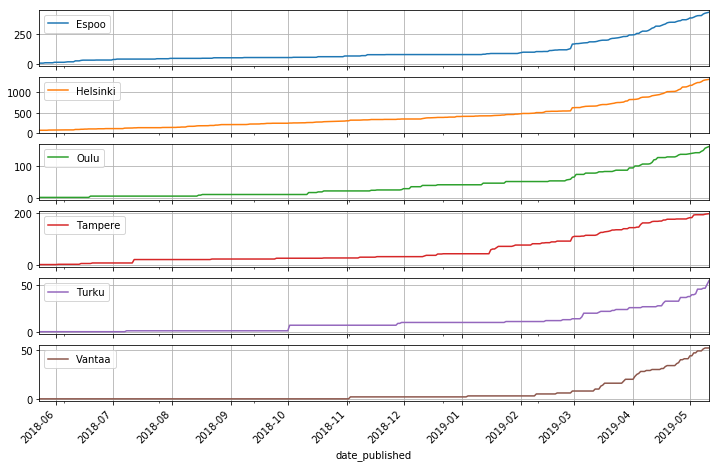

In [15]:
pivot_location_vs_time[1:].cumsum().plot(rot=45, subplots=True, grid = True, figsize = (12,8), kind='line');